# Barabasi Albert Model Experiments

In [4]:
from utils.basic_graphs_utilities import *
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [25]:
def draw_degree_distribution(graph, m, fig_title, file_title, theoretical_dist=False, loglog=True):
    degrees = [val for (node, val) in graph.degree()]
    degree_freq = nx.degree_histogram(graph)
    degrees = np.array(range(len(degree_freq)))
    plt.figure(figsize=(12, 8)) 
    if loglog:
        plt.loglog(degrees[m:], degree_freq[m:]/np.sum(degree_freq[m:]),'bo', mfc='none')
    else:
        plt.plot(degrees[m:], degree_freq[m:]/np.sum(degree_freq[m:]),'bo', mfc='none')
        plt.yscale('log')
    if theoretical_dist:
        plt.plot(degrees[m:], theoretical_dist(degrees[m:],m), 'r-', label="Theorical Distribution")
    plt.xlabel('k (degree)')
    plt.ylabel('P(k)')
    plt.title(fig_title)
    plt.legend()
    plt.savefig(f"results/50/barabasi_albert/{file_title}", dpi=300)
    plt.show()

In [21]:
nx_ba_graph = generate_graph(None, d=1,n=100000, tipology="barabasi_albert", mba=1 )

In [22]:
# # networkx implementation
# fig = plt.figure(figsize=(10,8))
# nx.draw_networkx(nx_ba_graph, with_labels=True, font_weight='normal', node_size=100)

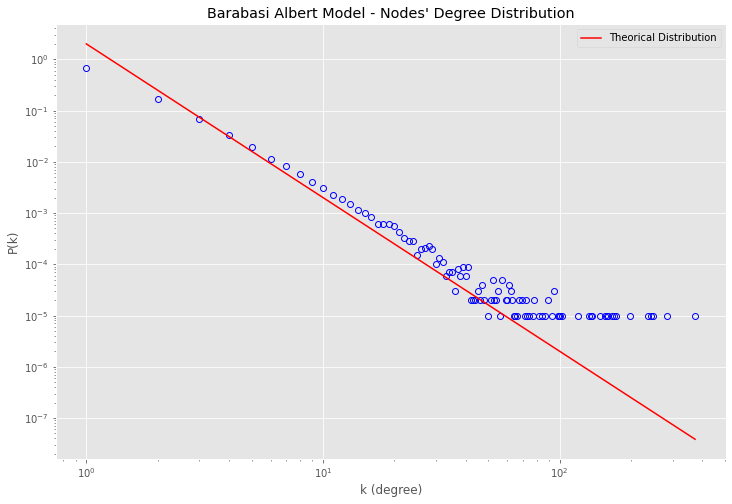

In [23]:
def ba_powerlaw(x, m):
    return 2*(m**2)*1/(x**3)

draw_degree_distribution(
    nx_ba_graph, 
    1, 
    "Barabasi Albert Model - Nodes' Degree Distribution",
    "degree_distribution",
    ba_powerlaw,
    loglog=True
    )

In [138]:
# barabasi albert implementation from Bollobas et al (2001)
G, graph_list = generate_barabasi_albert(10000,1, save_steps=True)

In [ ]:
# fig = plt.figure(figsize=(10,8))
# nx.draw_networkx(G, with_labels=True, font_weight='normal', node_size=100)

In [ ]:
# save intermediate steps

# for i,g in enumerate(graph_list):
#     fig = plt.figure(figsize=(10,8))
#     # print(g.nodes)
#     nx.draw_kamada_kawai(g, with_labels=True, node_size=100)
#     plt.savefig(f"./frames/frame{i}")
#     plt.show()

## Model A

In [17]:
# n = 50000
n = 1000
GA, _ = ba_model_A(n,1)

In [18]:
# fig = plt.figure(figsize=(10,8))
# nx.draw_networkx(GA, node_size=100)

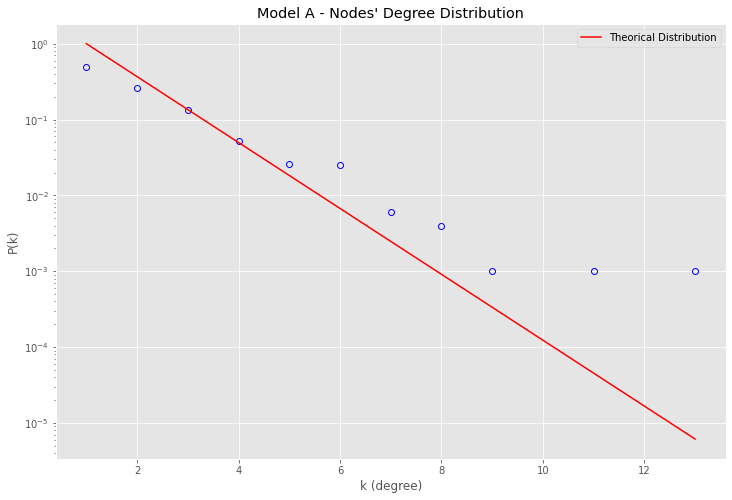

In [24]:
def exponential_modelA(x, m):
    return (np.e/m) * np.exp(-x/m)

draw_degree_distribution(
    GA, 
    1, 
    "Model A - Nodes' Degree Distribution",
    "degree_distribution_model_A",
    exponential_modelA,
    loglog=False
    )

## Model B

In [50]:
GB, _ = ba_model_B(10000,10000)

No handles with labels found to put in legend.


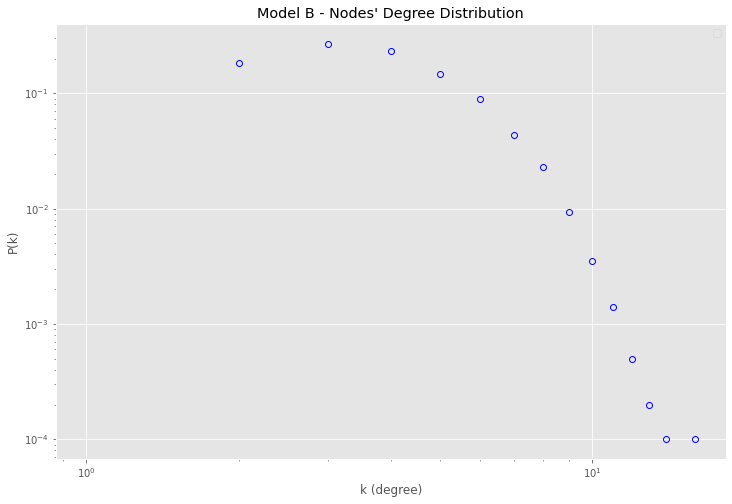

In [53]:
draw_degree_distribution(
    GB,
    1,
    "Model B - Nodes' Degree Distribution",
    "degree_distribution_model_B",
    loglog=True
)